In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.rcParams["font.family"] = "Arial"
sns.set(style="ticks")

In [4]:
# All params
Q_list = [0.15]
W_list = [0.15]
D_list = [0.6]
T_list = [0.00001, 0.0001, 0.001, 0.01, 0.025, 0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1.0]
wb_list = [5.0]
decay_list = [18.0]
Time = np.arange(0, 400, 0.05)

In [5]:
def calc_distance(vx, t, D, W, T, decay):
    term = np.sqrt(np.log(W/np.sqrt(t)) - np.log(T) - decay*t)
    L = vx*t + 2*np.sqrt(D*t) * term
    return L

In [11]:
gamma = 0
t = 20
termA = phi_c * t/np.sqrt(phi_0) + gamma*t
term = -4*D*t * np.log(termA)

# Issue with square root with "term"
np.sqrt(term)

/Users/dieumynguyen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


nan

In [7]:
def calc_distance(vx, t, D, phi_0, phi_c, gamma):
    termA = phi_c * t/np.sqrt(phi_0) + gamma*t
    term = -4*D*t * np.log(termA)
    L = vx*t + np.sqrt(term)
    return L

In [8]:
constraint = lambda t, q0, qc, gamma: t < qc**2 / (gamma*2*q0 + 1e-6) 

/Users/dieumynguyen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


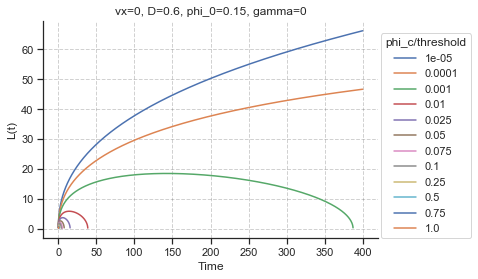

In [17]:
Time = np.arange(0, 400, 0.05) + 0.01

vx = 0
D = 0.6
phi_0 = 0.15
gamma = 0
phi_cs = [0.00001, 0.0001, 0.001, 0.01, 0.025, 0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1.0]

y = []

# Varying over gamma
for i, phi_c in enumerate(phi_cs):
    t_ = np.array([t for t in Time if constraint(t, phi_c, phi_0, gamma)])
    distance = calc_distance(vx=vx, t=t_, D=D, phi_0=phi_0, phi_c=phi_c, gamma=gamma)
    plt.plot(t_, distance, label=phi_c)
    # plt.fill_between(t_, distance, facecolor=colors[i], alpha=0.25, interpolate=True)

plt.legend(title="phi_c/threshold", loc=(1.01, 0))
plt.title(f"vx={vx}, D={D}, phi_0={phi_0}, gamma={gamma}")
plt.xlabel("Time")
plt.ylabel("L(t)")
ax = plt.gca()
ax.xaxis.grid(b=True, color='k', alpha=0.2, linestyle='--', linewidth=1)
ax.yaxis.grid(b=True, color='k', alpha=0.2, linestyle='--', linewidth=1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

### Diffusion Equation

In [23]:
Q0 = 0.1
wx = 0
gamma = 0.1
D = 0.1
x = 1
get_C = lambda t, Q0=0.1, gamma=0.1: np.sqrt(Q0/t) * np.exp(-(x-wx*t)**2 / (4*D*t) - gamma*t)

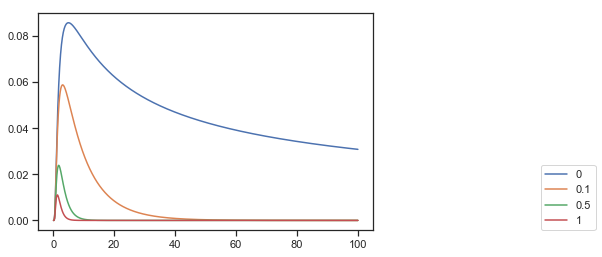

In [26]:
T = np.arange(0, 100, 0.1) + 0.1
for g in [0, 0.1, 0.5, 1]:
    C = get_C(T, gamma=g)
    plt.plot(T, C, label=g)
plt.legend(loc=(1.5,0))